## Лабораторная работа №1 | Вариант 5

Выполнил:  Коваленко Денис

### 1. Numpy

In [111]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [112]:
identity_matrix = np.eye(3)
print(identity_matrix)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


2. Создайте кастомный dtype который описывает цвет состоящий из 4х unsigned bytes(RGBA пиксель)

In [113]:
res = np.dtype([('r', np.uint8), ('g', np.uint8), ('b', np.uint8), ('a', np.uint8)])

3. Как игнорировать все numpy warnings(не рекомендуем к использованию)?

In [114]:
np.seterr(all='ignore')
result = np.divide(5, 0)
print(result)

inf


4. Создайте случайный вектор размера 10 и отсортируйте его

In [115]:
start = (np.random.random(10) * 100).astype(int)
end = np.sort(start)

print(start, end)

[22 32 28 49 76  2 88 15 19 50] [ 2 15 19 22 28 32 49 50 76 88]


5. Создайте read-only массив(неизменяемый)

In [116]:
arr = np.array([1, 2, 3, 4, 5])
arr.flags.writeable = False

arr[0] = 1

ValueError: assignment destination is read-only

6. Рассмотрим случайную матрицу размером 10х2, представляющую декартовы координаты, преобразуем их в полярные координаты

In [36]:
cords = (np.random.random((10, 2)) * 100).astype(int)
x, y = cords[:, 0], cords[:, 1]

r = np.sqrt(x**2 + y**2)
theta = np.arctan2(y, x)

print(cords)
print(np.column_stack((r, theta)))

[[ 1 50]
 [57 76]
 [11 97]
 [93 27]
 [12 43]
 [31 64]
 [37 31]
 [24 34]
 [46 65]
 [42 12]]
[[50.009999    1.55079899]
 [95.          0.92729522]
 [97.62171889  1.45787667]
 [96.84007435  0.28255495]
 [44.64302857  1.29865044]
 [71.11258679  1.11972667]
 [48.27007354  0.69739079]
 [41.61730409  0.95613337]
 [79.63039621  0.95492637]
 [43.68065934  0.27829966]]


7. Создайте структурированный массив с координатами x и y, охватывающий область [0,1]x[0,1]

In [39]:
x = np.linspace(0, 1, 3)
y = np.linspace(0, 1, 3)
X, Y = np.meshgrid(x, y)

coord_dtype = np.dtype([('x', 'float'), ('y', 'float')])
cords = np.empty(X.shape, dtype=coord_dtype)
cords['x'] = X
cords['y'] = Y

print(cords)

[[(0. , 0. ) (0.5, 0. ) (1. , 0. )]
 [(0. , 0.5) (0.5, 0.5) (1. , 0.5)]
 [(0. , 1. ) (0.5, 1. ) (1. , 1. )]]


8. Учитывая два массива X и Y, постройте матрицу Коши $C$ ($C_{ij} =\frac{1}{x_i - y_j}$)

In [4]:
x = np.random.normal(size=5)
y = np.random.normal(size=5)

X, Y = np.meshgrid(x, y)
C = 1 / (X - Y)

print(C)

[[ -0.77467748  -0.71770288  -0.55694081  -1.66898185  -1.75177703]
 [  0.49079291   0.5167839    0.65237696   0.36640621   0.36264336]
 [ -1.89752792  -1.58862309  -0.96930725   6.07199101   5.18109455]
 [102.95860028 -10.78029691  -2.02040399   1.42571036   1.37038203]
 [  0.69779275   0.75153173   1.07709047   0.47063643   0.46444636]]


9. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [18]:
start = [1.5, 2.7, 3.1, 4.9]
res = list(map(int, start))

print(res)

[1, 2, 3, 4]


10. Как случайно заменить p элементов в 2D массиве?

In [21]:
start = np.arange(25).reshape(5, 5)
print(start)

start.flat[np.random.choice(start.size, 5, replace=False)] = 69
print(start)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
[[ 0 69 69  3 69]
 [ 5  6  7  8  9]
 [69 11 12 13 69]
 [15 16 17 18 19]
 [20 21 22 23 24]]


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Классический начальный набор данных - данные пассажиров титаника.

Файл: `data.csv`

```
PassangerId - уникальный номер пассажира
Survived - выжил человек или нет
Pclass - класс обслуживания
Name - имя человека, обращение к ней/нему
Sex - пол человека
Age - возраст на момент крушения
SibSp - количество братьев и сестер / супругов на борту "Титаника"
Parch - количество родителей / детей на борту "Титаника"
Ticket - номер билета
Fare - стоимость проезда для пассажиров
Cabin - каюта
Embarked - причал отбытия. C = Cherbourg Q = Queenstown S = Southampton
```

In [22]:
import pandas as pd

In [99]:
data = pd.read_csv('data.csv')

1. Узнайте сколько было на борту человек

In [24]:
print(len(data))

891


2. Какой медианный и средний возраста пассажиров

In [25]:
print(data['Age'].median())
print(data['Age'].mean())


28.0
29.69911764705882


3. Посчитайте процент выживаемости детей(до 16 лет) и взрослых

In [26]:
children = data[data['Age'] < 16]
adults = data[data['Age'] >= 16]

print(children['Survived'].mean() * 100, "Children")
print(adults['Survived'].mean() * 100, "Adults")


59.036144578313255
38.193343898573694


4. Верна ли гипотеза, что женщины и дети сажались в шлюпки первыми и выживали больше?

In [27]:
women = data[data['Sex'] == 'female']['Survived'].mean()
men = data[data['Sex'] == 'male']['Survived'].mean()
children = data[data['Age'] < 16]['Survived'].mean()
adults = data[data['Age'] >= 16]['Survived'].mean()

print(women > men and children > adults)

True


5. Зависит ли выживаемость от класса обслуживания?

In [29]:
survival = data.groupby('Pclass')['Survived'].mean()

print(survival[1] > survival[2] > survival[3])

True


6. Посчитайте средний возраст умерших женщин и мужчин

In [30]:
women = data[(data['Sex'] == 'female') & (data['Survived'] == 0)]['Age'].mean()
men = data[(data['Sex'] == 'male') & (data['Survived'] == 0)]['Age'].mean()

print("Women", women)
print("Men", men)

Women 25.046875
Men 31.618055555555557


7. Различается ли процент выживаемости пассажиров с хотя бы одним родственником на борту и одиночек?

In [35]:
data['hasRelatives'] = (data['SibSp'] + data['Parch']) > 0

notSolo = data[data['hasRelatives']]['Survived'].mean() * 100
Solo = data[~data['hasRelatives']]['Survived'].mean() * 100

print(notSolo != Solo)

True


8. Различается ли средняя стоимость билета у умерших и выживших пассажиров?

In [37]:
surv= data[data['Survived'] == 1]['Fare'].mean()
dead = data[data['Survived'] == 0]['Fare'].mean()

print (surv != dead)

True


9. Выведите максимальный и минимальный возраст выживших пассажиров во 2 классе обслуживания

In [40]:
# 9. Максимальный и минимальный возраст выживших пассажиров 2 класса
surv2 = data[(data['Survived'] == 1) & (data['Pclass'] == 2)]
maxx = surv2['Age'].max()
minn = surv2['Age'].min()

print(maxx, "ловит даже на парковке")
print(minn, "min")


62.0 ловит даже на парковке
0.67 min


10. Подтвердите или опровергните гипотезу: молодым мужчинам(от 18 лет) выжить легче, чем более взрослым

In [41]:
loxi = data[(data['Sex'] == 'male') & (data['Age'] >= 18) & (data['Age'] <= 30)]
prizivniki = data[(data['Sex'] == 'male') & (data['Age'] > 30)]

loxi2 = loxi['Survived'].mean() * 100
prizivniki2 = prizivniki['Survived'].mean() * 100

print(loxi2 > prizivniki2)

False


### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

1. Постройте гистограмму распределения возростов пассажиров

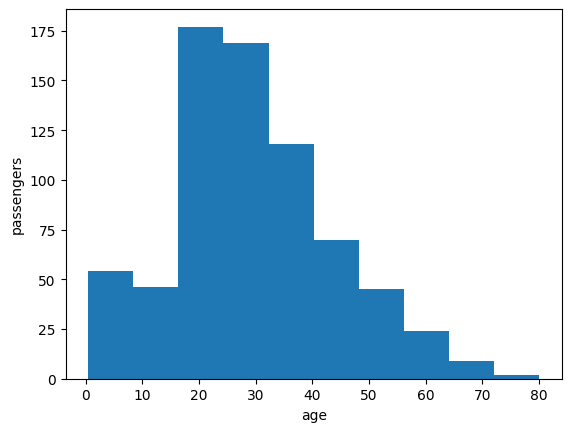

In [50]:
import matplotlib.pyplot as plt

ages = data['Age'].dropna()

plt.hist(ages)
plt.xlabel('age')
plt.ylabel('passengers')
plt.show()

2. Постройте гистограммы распределения цен для пассажиров разных классов

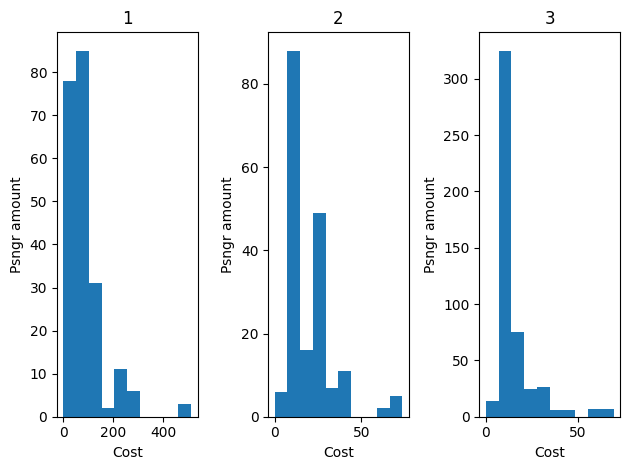

In [55]:
for i, pclass in enumerate(sorted(data['Pclass'].unique()), 1):
    plt.subplot(1, 3, i)
    fares = data[data['Pclass'] == pclass]['Fare'].dropna()
    plt.hist(fares)
    plt.title(pclass)
    plt.xlabel('Cost')
    plt.ylabel('Psngr amount')

plt.tight_layout()
plt.show()

3. Постройте зависимость цены от возраста пассажира

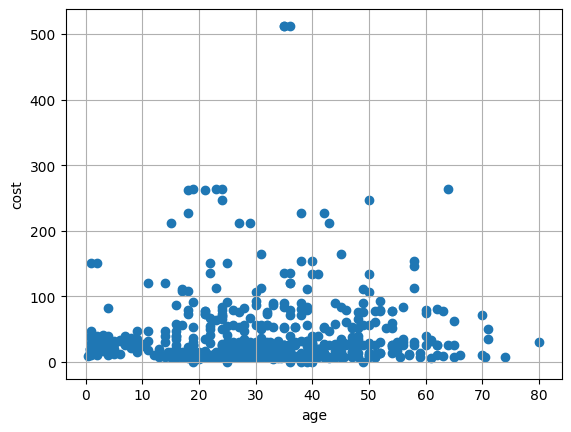

In [64]:
plt.scatter(data['Age'], data['Fare'])
plt.xlabel('age')
plt.ylabel('cost')
plt.grid()
plt.show()

4. Постройте box plot отображающий распределение цен на билеты в разных классах

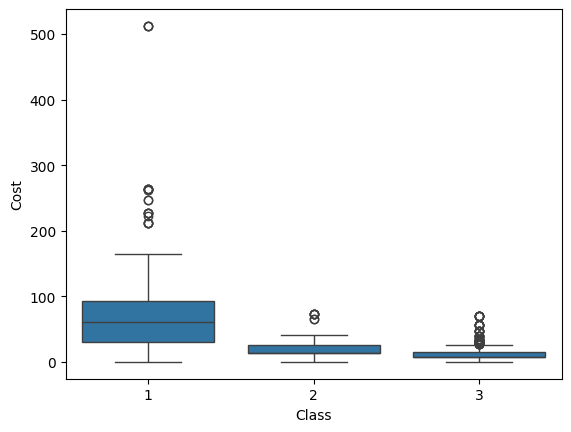

In [70]:
import seaborn as sns

sns.boxplot(data=data, x='Pclass', y='Fare')
plt.xlabel('Class')
plt.ylabel('Cost')
plt.show()

5. Визуализируйте распределение долей выживших среди мужчин, женщин и детей(до 16 лет)

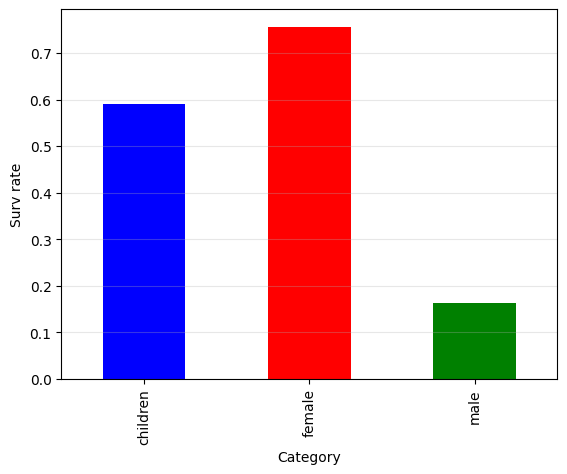

In [83]:
data['Category'] = data.apply(lambda x: 'children' if x['Age'] < 16 else x['Sex'], axis=1)
surv = data.groupby('Category')['Survived'].mean()

surv.plot(kind='bar', color=['blue', 'red', 'green'])
plt.ylabel('Surv rate')
plt.grid(axis='y', alpha=0.3)
plt.show()

6. Сравните плотности распределения возростов выживших и умерших пассажиров, сделайте выводы

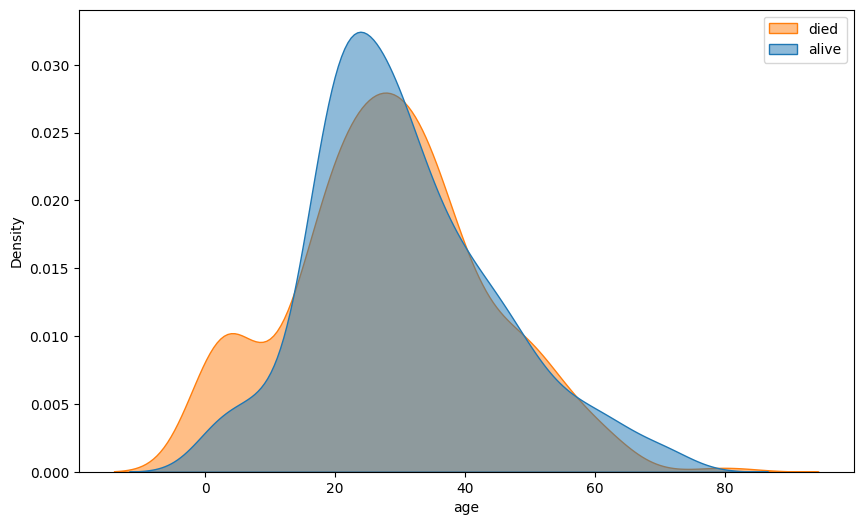

In [88]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='Age', hue='Survived', common_norm=False, fill=True, alpha=0.5)
plt.xlabel('age')
plt.legend(['died', 'alive'])
plt.show()

7. Постройте круговую диаграмму отображающую выживаемость мужчин и женщин в разных классах обслуживания(визуализация должна быть интуитивно понятная без объяснений, женщины и мужчины соответствующих классов объеденены визуально в одну группу и 2 подгруппы)*

\* Задание на доп. балл

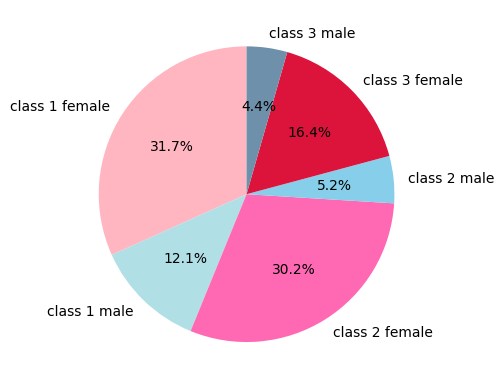

In [110]:
dataNeeded = data[['Pclass', 'Sex', 'Survived']].dropna()

survival_by_class_sex = dataNeeded.groupby(['Pclass', 'Sex'])['Survived'].mean()

labels = [f"class {pclass} {sex}" for pclass, sex in survival_by_class_sex.index]

colors_map = {
    (1, 'female'): '#FFB6C1',
    (1, 'male'): '#B0E0E6',
    (2, 'female'): '#FF69B4',
    (2, 'male'): '#87CEEB',
    (3, 'female'): '#DC143C',
    (3, 'male'): '#6E90AA',
}

colors = [colors_map[(pclass, sex)] for pclass, sex in survival_by_class_sex.index]

plt.pie(survival_by_class_sex.values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.show()